In [1]:
# Add the project base directory to the path
import os
import sys
project_dir = os.path.abspath('../../')
sys.path.insert(0, project_dir)
# Import GUARD
from guard import World, analysis, default_parameters, area
import copy

In [2]:
def simulation(world, n_sim, date_ranges):
    attack_frequency = []
    battles_by_size = []
    
    for run in range(n_sim):
        world.reset()
        attack_frequency.append(analysis.AttackEvents(world,
                                                      date_ranges=date_ranges))

        for step in range(1500):
            world.step(attack_frequency[run].sample)
            if world.step_number % 100 == 0:
                print('simulation: {:d}\tstep: {:4d}\tyear: {:d}'.format(
                      run, world.step_number, world.year())
                      )
    return attack_frequency

In [3]:
date_ranges = [
        analysis.DateRange(-1500, -1000),
        analysis.DateRange(-1000, -500),
        analysis.DateRange(-500, 0),
        analysis.DateRange(0, 500),
        analysis.DateRange(500, 1000),
        analysis.DateRange(1000, 1100),
        analysis.DateRange(1100, 1200),
        analysis.DateRange(1200, 1300),
        analysis.DateRange(1300, 1400),
        analysis.DateRange(1400, 1500)]

params = copy.deepcopy(default_parameters)

params = params._replace(spread_para_on_ethnocide=True)
# use the added Leviathan agricultural and paradigm spread models
params = params._replace(icono=True)
# simple contagion-style spread? 'Perfect' or 'FutureDiscounted'
# else None use feedback "structuring structure" style 'Icono'
#params = params._replace(contagion=None)

params = params._replace(num_icono_loops=2)
params = params._replace(workrate_change=0.1)
params = params._replace(threshold=10)
params = params._replace(mut_amount=1)
params = params._replace(mutation_rate=0.01)

world = World.from_file(project_dir+'/data/old_world.yml', params)

battles = analysis.Battles(world, date_ranges, project_dir+'/data/battles.yml')

attack_frequency = simulation(world, 5, date_ranges)
battles_by_size = world.battles_by_size
mean_attack_frequency = analysis.AttackEvents.mean(attack_frequency)
mean_attack_frequency.dump('./attack_frequency.pkl')


simulation: 0	step:  100	year: -1300
simulation: 0	step:  200	year: -1100
simulation: 0	step:  300	year: -900
simulation: 0	step:  400	year: -700
simulation: 0	step:  500	year: -500
simulation: 0	step:  600	year: -300
simulation: 0	step:  700	year: -100
simulation: 0	step:  800	year: 100
simulation: 0	step:  900	year: 300
simulation: 0	step: 1000	year: 500
simulation: 0	step: 1100	year: 700
simulation: 0	step: 1200	year: 900
simulation: 0	step: 1300	year: 1100
simulation: 0	step: 1400	year: 1300
simulation: 0	step: 1500	year: 1500
simulation: 1	step:  100	year: -1300
simulation: 1	step:  200	year: -1100
simulation: 1	step:  300	year: -900
simulation: 1	step:  400	year: -700
simulation: 1	step:  500	year: -500
simulation: 1	step:  600	year: -300
simulation: 1	step:  700	year: -100
simulation: 1	step:  800	year: 100
simulation: 1	step:  900	year: 300
simulation: 1	step: 1000	year: 500
simulation: 1	step: 1100	year: 700
simulation: 1	step: 1200	year: 900
simulation: 1	step: 1300	year: 110

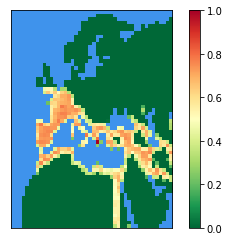

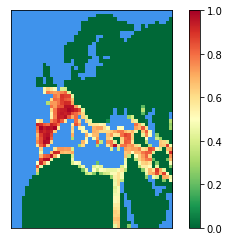

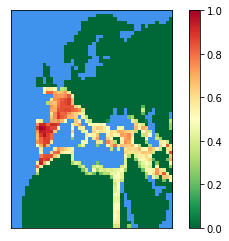

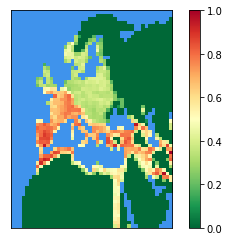

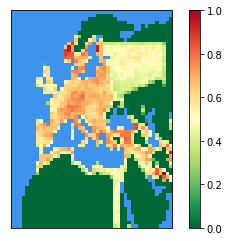

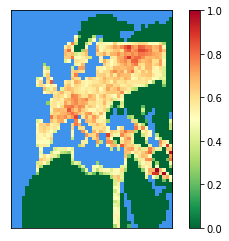

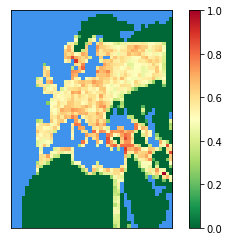

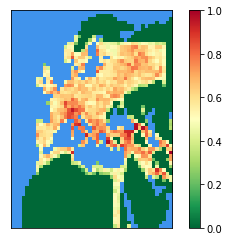

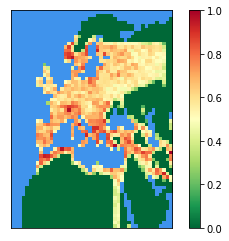

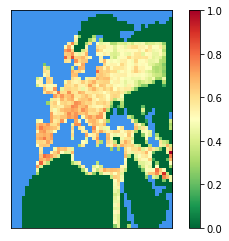

In [4]:
# Define european region
europe = area.Rectangle(3, 49, 58, 120)

# Plot attack frequency
mean_attack_frequency.plot_all(area=europe)

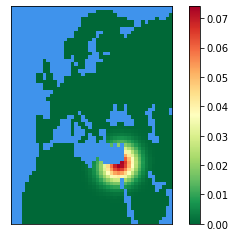

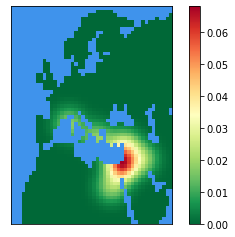

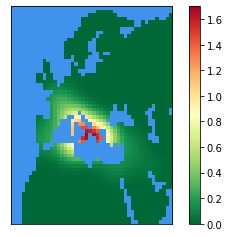

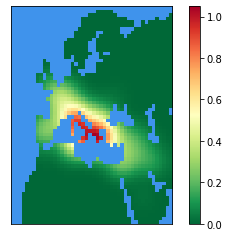

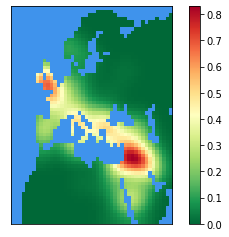

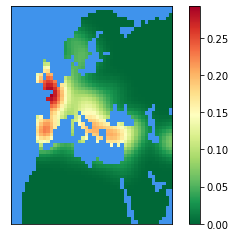

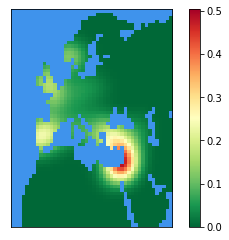

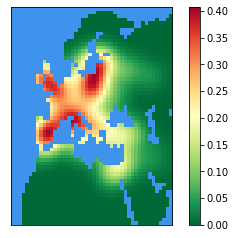

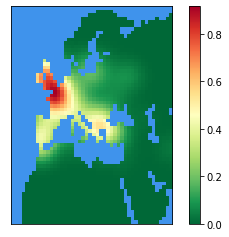

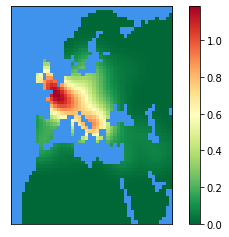

In [5]:
blur = 3.0

# Plot historical battles heatmap
battles.plot_heatmap(blur=blur, area=europe)

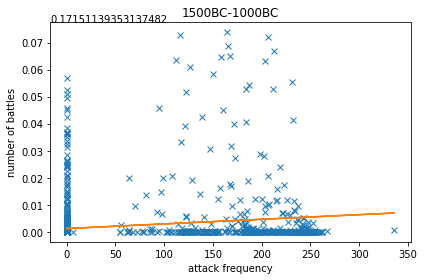

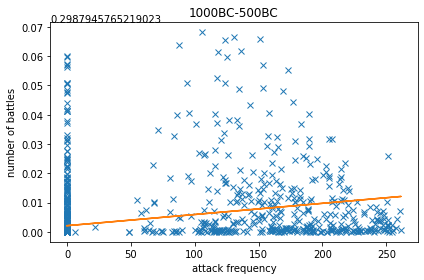

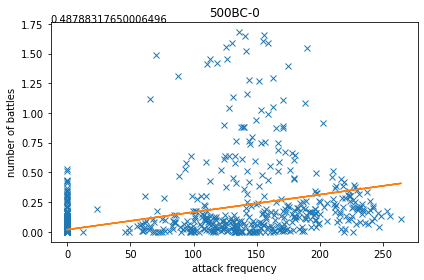

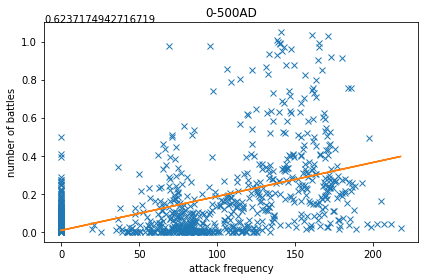

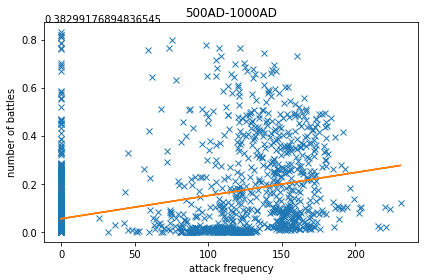

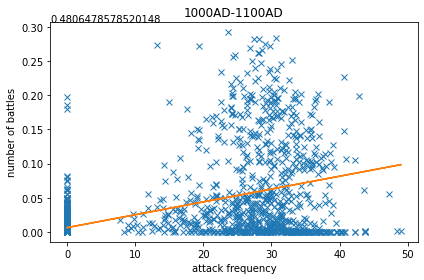

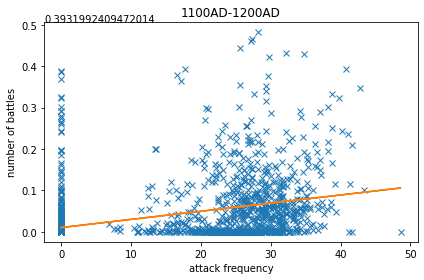

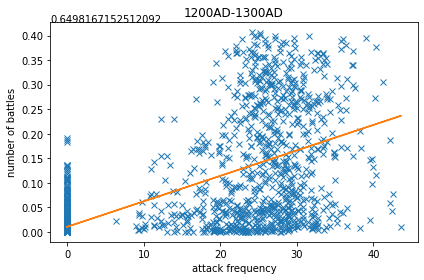

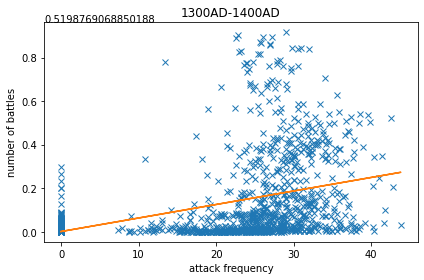

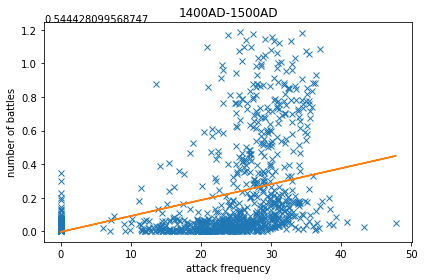

(0.455286723027757, 1856.0, 0.0, 0.0, 0.0)

In [6]:
# Plot correlation using a log-log scale
battles.correlate(mean_attack_frequency, blur=blur, area=europe, log_log=False)

478
2


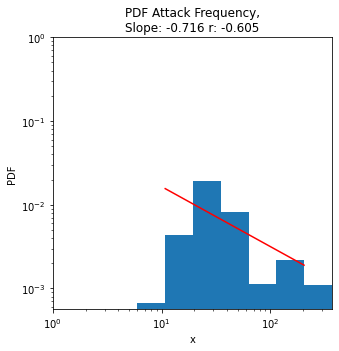

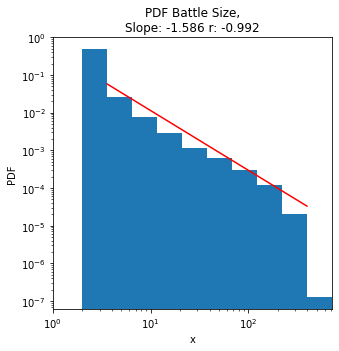

In [7]:
#power law attempt
#mean_accumulator = cls(attack_frequency[0].world, attack_frequency[0].date_ranges)
data = []
for era in date_ranges:
    flat_acc = [x for acc in mean_attack_frequency.data[era] for x in acc]
    data += flat_acc
    
import numpy as np    
battles_by_size = [i for i in battles_by_size if i >= 1]
print (np.max(battles_by_size))
print (np.min(battles_by_size))
#print(data)
#print(mean_attack_frequency.data[date_ranges[0]])
    
analysis.logLogHistogramOut(data, 'Attack Frequency', bin_multiplier=1.8)
#analysis.logLogHistogramOut([x+1 for x in data], 'Attack Frequency + 1', bin_multiplier=1.8)
analysis.logLogHistogramOut(battles_by_size, 'Battle Size', bin_multiplier=1.8)
    